# 1. Instalando e importando bibliotecas 

Esse código é correspondente ao vídeo https://youtu.be/GakKb-ju36U

In [1]:
!pip install -U pandas_datareader

Requirement already up-to-date: pandas_datareader in c:\programdata\anaconda3\lib\site-packages (0.10.0)


In [7]:
import pandas as pd

In [12]:
import pandas_datareader as pdr
import yfinance as yf
import investpy

# 2. Importando dados de ações

In [3]:
dados = pdr.data.get_data_yahoo('WEGE3.SA',start='2019-01-01')

In [4]:
dados.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,9.090,8.75,8.810,8.990,4751200.0,8.693207
2019-01-03,9.195,8.85,9.000,9.195,8316400.0,8.891438
2019-01-04,9.340,9.00,9.200,9.300,8340200.0,8.992972
2019-01-07,9.380,9.10,9.375,9.155,5860200.0,8.852759
2019-01-08,9.215,9.02,9.185,9.080,6306800.0,8.780235


In [65]:
inicio = '2020-09-01'

In [66]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA']

In [67]:
precos_acoes = pd.DataFrame()

for i in acoes:
    precos_acoes[i] = pdr.data.get_data_yahoo(i,start=inicio)['Adj Close']

In [68]:
precos_acoes.head()

,PETR4.SA,WEGE3.SA,MGLU3.SA,LREN3.SA,VALE3.SA,BPAC11.SA
Date,,,,,,
2020-09-01,20.881645,33.097397,23.790453,45.038513,55.627811,20.699972
2020-09-02,20.817730,33.038055,23.336256,45.147465,55.231503,20.512371
2020-09-03,20.890776,31.861135,22.085964,45.256416,53.430080,20.110025
2020-09-04,20.927299,31.890806,22.153343,45.860634,54.483913,19.784197
2020-09-08,20.324678,31.153984,21.883823,45.731865,53.385048,19.260897


# 3. Importando dados de FIIs, ETFs e BDRs

In [69]:
petr = yf.download('PETR4.SA', start = inicio)

[*********************100%***********************]  1 of 1 completed


In [70]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,22.200001,22.889999,22.120001,22.870001,20.881645,66299700
2020-09-02,22.930000,23.100000,22.520000,22.799999,20.817730,53618000
2020-09-03,22.610001,23.120001,22.570000,22.879999,20.890776,87642400
2020-09-04,23.000000,23.030001,22.580000,22.920000,20.927299,52351100
2020-09-08,22.500000,22.500000,21.910000,22.260000,20.324678,74490200


In [71]:
ativos = ['KNRI11.SA', 'ONEF11.SA', 'HCTR11.SA', 'HGLG11.SA', 'HGBS11.SA', 'SMAL11.SA', 'IVVB11.SA', 'AAPL34.SA']

In [72]:
precos_ativos = pd.DataFrame()

for i in ativos:
    precos_ativos[i] = yf.download(i, start = inicio)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 4. Importando dados de índices, commodities e criptomoedas

### Índices

In [73]:
search_results = investpy.search_quotes(text = 'bvsp', products = ['indices'], countries = ['brazil'], n_results = 10)

In [74]:
for search_result in search_results[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [75]:
ibov = search_result.retrieve_historical_data(from_date = '01/09/2020', to_date = '04/09/2021')

In [76]:
ibov.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-01,99382.0,102238.0,99382.0,102168.0,9384718
2020-09-02,102168.0,102824.0,100872.0,101911.0,7557936
2020-09-03,101911.0,103226.0,99751.0,100721.0,12610951
2020-09-04,100733.0,101582.0,98961.0,101242.0,11327366
2020-09-08,101239.0,101239.0,99373.0,100050.0,8478956


In [77]:
ibov = pd.DataFrame(ibov.Close).rename(columns = {'Close': 'IBOV'})

In [78]:
ibov.head()

,IBOV
Date,
2020-09-01,102168.0
2020-09-02,101911.0
2020-09-03,100721.0
2020-09-04,101242.0
2020-09-08,100050.0


### Commodities

In [43]:
search_results = investpy.search_quotes(text = 'coffee', products = ['commodities'], countries = ['brazil'], n_results = 10)

for search_result in search_results[:5]:
    print(search_result)

{"id_": 964526, "name": "Arabica Coffee 4/5 Futures", "symbol": "ICFc1", "country": "brazil", "tag": "/commodities/arabica-coffee-4-5", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [79]:
cafe = search_result.retrieve_historical_data(from_date = '01/09/2020', to_date = '04/09/2021')

In [80]:
cafe.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-01,99382.0,102238.0,99382.0,102168.0,9384718
2020-09-02,102168.0,102824.0,100872.0,101911.0,7557936
2020-09-03,101911.0,103226.0,99751.0,100721.0,12610951
2020-09-04,100733.0,101582.0,98961.0,101242.0,11327366
2020-09-08,101239.0,101239.0,99373.0,100050.0,8478956


In [81]:
cafe = pd.DataFrame(cafe.Close).rename(columns = {'Close': 'Cafe'})

### Criptomoedas

In [84]:
bitcoin = investpy.get_crypto_historical_data(crypto = 'bitcoin',from_date = '01/09/2020', to_date = '04/09/2021')

bitcoin = pd.DataFrame(bitcoin.Close).rename(columns = {'Close': 'Bitcoin'})

In [85]:
bitcoin.head()

,Bitcoin
Date,
2020-09-01,11914.9
2020-09-02,11413.3
2020-09-03,10168.8
2020-09-04,10472.5
2020-09-05,10092.2


In [87]:
ethereum = investpy.get_crypto_historical_data(crypto = 'ethereum',from_date = '01/09/2020', to_date = '04/09/2021')

ethereum = pd.DataFrame(ethereum.Close).rename(columns = {'Close': 'Ethereum'})

In [88]:
ethereum.head()

,Ethereum
Date,
2020-09-01,475.80
2020-09-02,439.08
2020-09-03,381.97
2020-09-04,385.94
2020-09-05,334.91


# 5. Dados do dólar

In [89]:
dolar = yf.download('USDBRL=X', start = inicio)

[*********************100%***********************]  1 of 1 completed


In [90]:
dolar.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,5.4914,5.492500,5.355700,5.4909,5.4909,0
2020-09-02,5.3967,5.422366,5.343658,5.3973,5.3973,0
2020-09-03,5.3384,5.371400,5.287600,5.3387,5.3387,0
2020-09-04,5.2901,5.324300,5.248000,5.2899,5.2899,0
2020-09-07,5.3030,5.303300,5.295871,5.3010,5.3010,0


In [91]:
dolar = pd.DataFrame(dolar.Close).rename(columns = {'Close': 'dolar'})

In [92]:
dolar.head()

,dolar
Date,
2020-09-01,5.4909
2020-09-02,5.3973
2020-09-03,5.3387
2020-09-04,5.2899
2020-09-07,5.3010


# 6. Juntando tudo num dataframe só

In [93]:
from functools import reduce

In [94]:
dfs = [precos_acoes, precos_ativos, ibov, cafe, bitcoin, ethereum, dolar]

In [95]:
df_final = reduce(lambda left,right: pd.merge(left, right, on = 'Date', how = 'inner'), dfs)

In [96]:
df_final.head()

,PETR4.SA,WEGE3.SA,MGLU3.SA,LREN3.SA,VALE3.SA,BPAC11.SA,KNRI11.SA,ONEF11.SA,HCTR11.SA,HGLG11.SA,HGBS11.SA,SMAL11.SA,IVVB11.SA,AAPL34.SA,IBOV,Cafe,Bitcoin,Ethereum,dolar
Date,,,,,,,,,,,,,,,,,,,
2020-09-01,20.881645,33.097397,23.790453,45.038513,55.627811,20.699972,164.970001,149.699997,129.960007,171.860001,212.500000,118.989998,205.000000,71.886711,102168.0,102168.0,11914.9,475.80,5.4909
2020-09-02,20.817730,33.038055,23.336256,45.147465,55.231503,20.512371,165.970001,147.570007,130.479996,173.399994,212.820007,120.250000,206.610001,70.197609,101911.0,101911.0,11413.3,439.08,5.3973
2020-09-03,20.890776,31.861135,22.085964,45.256416,53.430080,20.110025,165.970001,147.630005,129.100006,174.000000,210.250000,117.860001,198.009995,63.580257,100721.0,100721.0,10168.8,381.97,5.3387
2020-09-04,20.927299,31.890806,22.153343,45.860634,54.483913,19.784197,167.610001,148.369995,129.220001,173.979996,211.699997,118.300003,195.600006,64.086990,101242.0,101242.0,10472.5,385.94,5.2899
2020-09-08,20.324678,31.153984,21.883823,45.731865,53.385048,19.260897,166.130005,151.940002,129.639999,173.000000,210.990005,118.690002,192.460007,60.609402,100050.0,100050.0,10126.6,337.46,5.2983


# 7. Matriz de correlação

In [97]:
import seaborn as sns

In [100]:
import matplotlib.pyplot as plt

<AxesSubplot:>

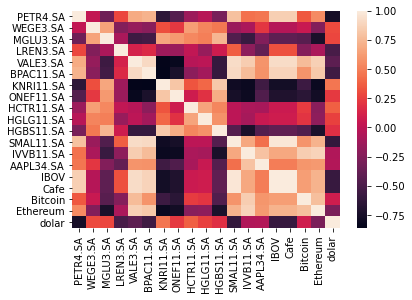

In [98]:
sns.heatmap(df_final.corr())

<AxesSubplot:>

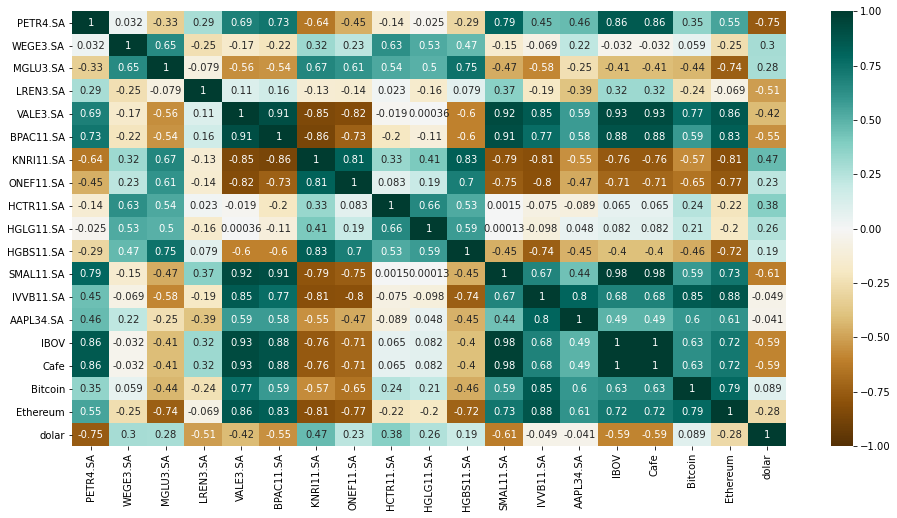

In [103]:
plt.figure(figsize = (16, 8))

sns.heatmap(df_final.corr(),
           vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')